## MBIO 691I Project Instructions
### Summary
We expect tropical coral cover to decline globally over the coming century, due to a combination of rapidly warming ocean temperatures and ocean acidification. The file `coral_model.csv` contains output from some ecological-evolutionary simulations predicting changes in coral cover between 2010-2020, and 2090-2100 (see [here](https://www.biorxiv.org/content/10.1101/2024.07.23.604846v1.full) for details, although this is *not* required reading for this project). The simulations cover around 52,000 sites. 12 different simulation configurations were run, each with slightly different future climate change predictions (due to uncertainty in future warming/ocean acidification). This CSV file contains the following data:

* **coral_cover_2020/2100**: Simulation estimates of tropical coral cover averaged across 2010-2020, and 2090-2100 respectively (km $^2$).
* **SST_2020/SST_2100**: Mean SST (sea-surface temperature) averaged across 2010-2020, and 2090-2100 respectively (degrees C).
* **SST_seasonal**: Amplitude of the seasonal SST cycle, i.e. difference between summer and winter SST (degrees C).
* **pH_2020/pH_2100**: Mean pH averaged across 2010-2020, and 2090-2100 respectively.
* **PAR**: Benthic Photosynthetically Available Radiation (mol m $^{-2}$ d $^{-1}$ ).
* **longitude/latitude**: Longitude/latitude of the site.
* **model**: Simulation configuration, numbered 0-11.


#### Part 2
Your task is to **visually summarise the output of these simulations** in **three figures of your choice**. The analyses and figures you produce are up to you, but here are some suggestions:
* A map showing the predicted percentage change in coral cover over the 21st century, averaged across simulations.
* A map showing variability in model predictions across the 12 configurations (e.g. where the configurations closely agree, and where they differ).
* A plot showing the predicted percentage change in coral cover over the 21st century (averaged across simulations) as a function of latitude.
* A plot showing the predicted percentage change in coral cover over the 21st century (averaged across simulations) as a function of the SST and/or pH change and/or seasonal cycle in SST.
* A plot investigating which explanatory variable is most important for predicting the simulated percentage change in coral cover over the 21st century.
* A plot showing the predicted percentage change in coral cover over the 21st century (averaged across simulations) as a function of the pH change.
* A plot comparing the mean predicted percentage change in coral cover over the 21st century between configurations.
* A plot showing the frequency density distribution of the change in coral cover over the 21st century across sites (possibly comparing between configurations or between regions).
* A plot showing the change in the [joint frequency density distribution](https://seaborn.pydata.org/examples/joint_kde.html) of coral cover as a function of SST and pH, between the start and end of the 21st century.

Each figure should be **exported as a publication-quality image file** (decide whether a raster or vector format is more appropriate) and should be accompanied by a caption of **up to 100 words each**. Each figure should have a file size of _at most_ 5 MB (maps) or 1 MB (all other figure types). There is no need to use any python packages that have not been discussed in this course; you will be assessed on the quality and clarity of your figures and code, *not* how sophisticated your data analyses are. However, if you are confident with statistics and would like to do some basic statistical modelling, you may be interested in the [statsmodels package](https://www.statsmodels.org/stable/index.html) and/or [scikit-learn](https://scikit-learn.org/stable/) (there is no obligation to do this, and this will not improve your grade). You may use matplotlib and/or seaborn, or any other (Python) plotting package you choose.

Analyses and plotting can be carried out using a Python script (.py) or jupyter notebook (.ipynb). However, if you use a jupyter notebook, please still export your figures as separate image files.

### Submission
Please submit your work, through a link to the public Github repository, **by 12 pm (midday) on Monday 4th November**. Please email this link to Phil Patton (pattonp@hawaii.edu), CC'ing Noam Vogt-Vincent (nvogt@hawaii.edu) and Lisa McManus (mcmanusl@hawaii.edu). Late submissions will lose 10% of their point value per day, unless you contact us beforehand for an extension.

### Grading rubric
**A**: You have produced three, high-quality data visualisations in an appropriate file format(s). The visualisations are clear and well thought-out, communicating useful and correct insights into the provided dataset. The code used to run analyses and plot data run without errors, are correct, and are clear to read through comprehensive and useful comments. Code has been made available in a public Github repository, which has been appropriately documented with a readme file. 

**B**: You have produced three data visualisations in an appropriate file format(s). The visualisations communicate useful and correct insights into the provided dataset, but may have some clarity or accessibility issues (e.g. labels are difficult to read, colour maps that do not distinguish well between data). The code used to run analyses and plot data run without errors, are correct, and are mostly clear to read through comments. Code has been made available in a public Github repository, which has been appropriately documented with a readme file.

**C**: You have produced three data visualisations. The visualisations communicate correct insights into the provided dataset, although they may not be completely useful (e.g. plotting a relationship between data without a good biological justification) or clear. The code used to run analyses and plot data run without errors, but may be difficult to read and/or have minor analytical mistakes. Code has been made available in a public Github repository, with some effort to write a readme file.

### Academic integrity
Please follow the guidelines given in the course syllabus and lectures. You can use any online resources, and you are free to adapt code samples found online for plotting. You do not need to cite these code samples *unless* they are doing something clearly novel that goes beyond the normal capabilities of plotting/analysis packages used.

### Sample code

In [204]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from matplotlib.colors import Normalize
#I'm going to try to add a basemap, which from my Googling, requires ccrs. If you don't have this installed, try this in your console:
#pip install cartopy.crs pyproj
from pyproj import Transformer
import cartopy.crs as ccrs
#For saving the figs, I also needed os. If you need it, run this in the console
#pip install os
import os

# Load the dataset
data = pd.read_csv('data/coral_forecast.csv', skiprows=[1])

# Group data by site
# Sites are characterised by a unique (lon, lat) combination. To group sites together, 
# we can firstly create a new column with the combined longitude and latitude.
data['lon_lat'] = list(zip(data.longitude, data.latitude))

# We can now perform groupby operations, e.g. computing mean values across all models
data_avg_across_models = data.groupby('lon_lat').mean().drop(columns='model')

# Display a summary
data

,coral_cover_2020,coral_cover_2100,SST_2020,SST_2100,SST_seasonal,pH_2020,pH_2100,PAR,longitude,latitude,model,lon_lat
0,0.945087,0.353438,29.528921,31.184600,1.772763,8.038183,7.891421,27.702822,73.083336,-0.583323,0,"(73.083336, -0.58332324)"
1,2.465595,0.941808,29.474524,31.176830,1.776562,8.038510,7.892168,28.178003,73.083336,0.249999,0,"(73.083336, 0.24999921)"
2,0.794634,0.314702,29.457602,31.177954,1.772937,8.038347,7.892172,34.368630,73.083336,0.333331,0,"(73.083336, 0.33333144)"
3,0.600634,0.235610,29.448437,31.168787,1.777875,8.038347,7.892172,36.212540,73.083336,0.416663,0,"(73.083336, 0.416663)"
4,0.417701,0.103169,29.443440,31.163788,1.787526,8.038347,7.892172,16.307220,73.083336,0.499994,0,"(73.083336, 0.49999365)"
...,...,...,...,...,...,...,...,...,...,...,...,...
629793,0.261050,0.001953,28.069360,29.456121,3.457812,8.035749,7.899463,0.724082,73.000000,17.790380,11,"(73.0, 17.79038)"
629794,0.357399,0.003596,28.038528,29.425290,3.569635,8.035749,7.899463,1.360838,73.000000,17.869710,11,"(73.0, 17.86971)"
629795,0.458385,0.004589,28.027624,29.437016,3.644466,8.035627,7.898623,2.711904,73.000000,17.949007,11,"(73.0, 17.949007)"
629796,0.556831,0.006339,28.000957,29.410349,3.747791,8.035482,7.898479,3.970286,73.000000,18.028267,11,"(73.0, 18.028267)"


# Figure 1


In [205]:
#Add column for coral_cover_change
data_avg_across_models['coral_cover_change'] = data_avg_across_models['coral_cover_2100'] - data_avg_across_models['coral_cover_2020']

In [206]:
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
data_avg_across_models['x'], data_avg_across_models['y'] = transformer.transform(data_avg_across_models['longitude'].values, data_avg_across_models['latitude'].values)

In [208]:
data_avg_across_models['coral_cover_change_percent'] = ((data_avg_across_models['coral_cover_2100'] - data_avg_across_models['coral_cover_2020']) / data_avg_across_models['coral_cover_2020']) * 100

The problem is % change has a WILD range. From -100.0% to like 6000%. But the histogram is ... telling:

(array([5.2719e+04, 1.3100e+02, 1.6000e+01, 4.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([-100.        ,  509.27753724, 1118.55507449, 1727.83261173, 2337.11014898, 2946.38768622, 3555.66522346,
        4164.94276071, 4774.22029795, 5383.4978352 , 5992.77537244]),
 <BarContainer object of 10 artists>)

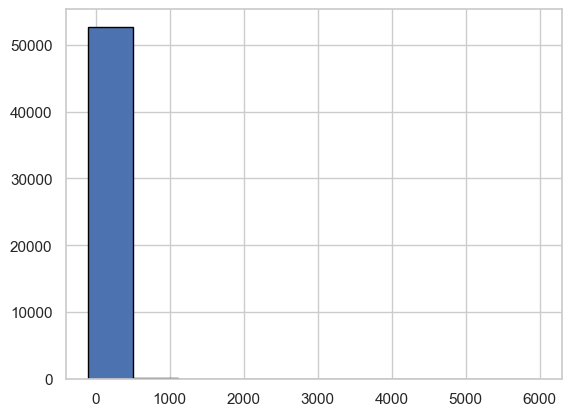

In [209]:
plt.hist(data_avg_across_models['coral_cover_change_percent'], edgecolor='black')

So I'm going to remove the top and bottom 1.5% of values:

In [210]:
# Calculate the 98.5th percentile value
percentile_985 = data_avg_across_models['coral_cover_change_percent'].quantile(0.985)
percentile_015 = data_avg_across_models['coral_cover_change_percent'].quantile(0.015)

# Filter the data to remove the top 1.5% of values
filtered_data = data_avg_across_models[data_avg_across_models['coral_cover_change_percent'] <= percentile_985]
filtered_data = filtered_data[filtered_data['coral_cover_change_percent'] >= percentile_015]

(array([11826., 12890., 13193., 10726.,  2219.,   189.,   103.,    57.,    44.,    37.]),
 array([-99.8349747 , -86.2975718 , -72.76016891, -59.22276601, -45.68536312, -32.14796023, -18.61055733,  -5.07315444,
          8.46424846,  22.00165135,  35.53905424]),
 <BarContainer object of 10 artists>)

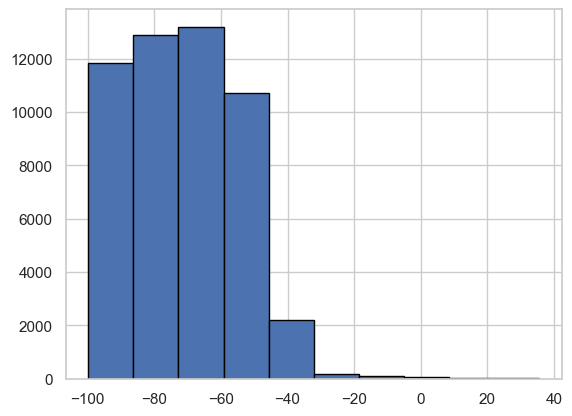

In [211]:
plt.hist(filtered_data['coral_cover_change_percent'], edgecolor='black')

That looks a little better, while still representing that some places increase in coral cover.

In [225]:
# Set up the map with Cartopy using PlateCarree projection (good for lat/lon)
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()  # Add coastline outlines
ax.set_global()  # Show the entire world view

# Normalize with respect to zero-centered values
norm = plt.Normalize(vmin=-100, 
                     vmax=100)

# Plot the data points, coloring by coral_cover_change_percent
scatter = sns.scatterplot(
    x='longitude', y='latitude', 
    hue='coral_cover_change_percent', 
    palette='vlag_r',  # Diverging palette centered at 0
    data=data_avg_across_models, 
    s=5,  # size of points
    marker='o',  # circular markers
    edgecolor='none',  # Remove the marker borders because it made everything black
    legend=False,  # remove sns colorbar because it sux
    hue_norm=norm
)

# Create the colorbar
sm = plt.cm.ScalarMappable(cmap='vlag_r', norm=norm)
sm.set_array([])  # This is a dummy array for the colorbar

# Add colorbar with label
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.02, pad=0.1)
cbar.set_label("Percent Change in Coral Cover")

# Set title
plt.title("Predicted Percent Change in Coral Cover Over the 21st Century")

# Add a caption
caption_text = "Figure 1: Map of the percent change in coral cover averaged across all 11 model simulations. Areas gaining coral cover are colored in blue, and areas losing coral cover are colored in red. To remove extreme values, we have removed the top and bottom 1.5% of data points."
plt.figtext(0.5, -0.05, caption_text, ha="center", fontsize=10, wrap=True)  # Adjust position as needed

# Define the path to the output folder
output_folder = "/Users/calliestephenson/Desktop/MBIO 691/Into_Sci_Computing/figs"
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Save the plot as a PNG file
output_path = os.path.join(output_folder, "Figure1.png")
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')  # Save with high resolution
plt.close()  # Close the figure to free up memory

print(f"Plot saved to {output_path}")

Plot saved to /Users/calliestephenson/Desktop/MBIO 691/Into_Sci_Computing/figs/Figure1.png


# Figure 2

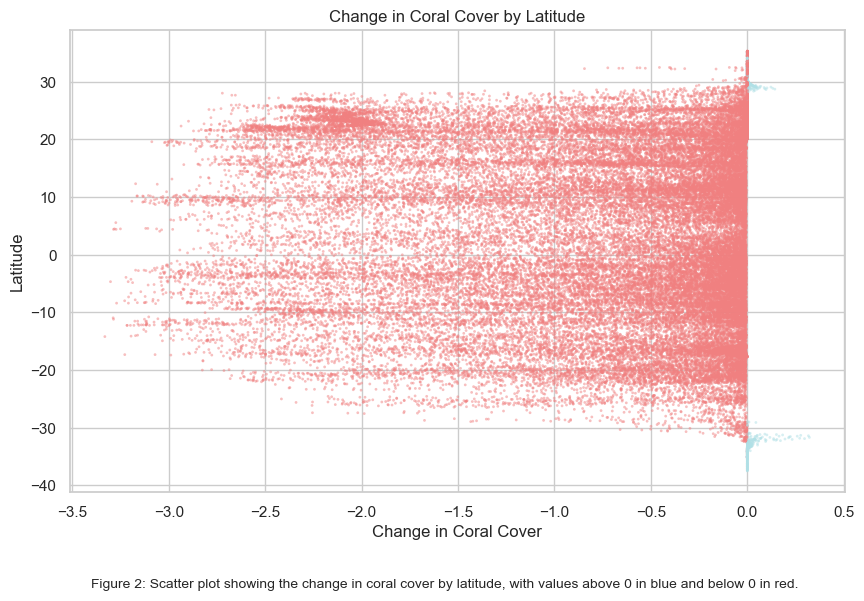

In [221]:
# Create a column to label values as 'Positive' or 'Negative'
data_avg_across_models['coral_cover_category'] = data_avg_across_models['coral_cover_change'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Set the plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the scatter plot with conditional colors
sns.scatterplot(
    y='latitude', 
    x='coral_cover_change', 
    data=data_avg_across_models,
    hue='coral_cover_category',  # Color based on positive or negative values
    palette={'Positive': 'powderblue', 'Negative': 'lightcoral'},  # Blue for positive, red for negative
    marker='o',  
    edgecolor='none',  
    alpha=0.5,
    s=4,
    legend = False
)

# Set labels and title
plt.ylabel("Latitude")
plt.xlabel("Change in Coral Cover")
plt.title("Change in Coral Cover by Latitude")
# Add a caption
caption_text = "Figure 2: Scatter plot showing the change in coral cover by latitude, with values above 0 in blue and below 0 in red."
plt.figtext(0.5, -0.05, caption_text, ha="center", fontsize=10, wrap=True)
plt.show()

That's... something. We can save it:

In [226]:
# Create a column to label values as 'Positive' or 'Negative'
data_avg_across_models['coral_cover_category'] = data_avg_across_models['coral_cover_change'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Set the plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the scatter plot with conditional colors
sns.scatterplot(
    y='latitude', 
    x='coral_cover_change', 
    data=data_avg_across_models,
    hue='coral_cover_category',  # Color based on positive or negative values
    palette={'Positive': 'powderblue', 'Negative': 'lightcoral'},  # Blue for positive, red for negative
    marker='o',  
    edgecolor='none',  
    alpha=0.5,
    s=4,
    legend = False
)

# Set labels and title
plt.ylabel("Latitude")
plt.xlabel("Change in Coral Cover")
plt.title("Change in Coral Cover by Latitude")
# Add a caption
caption_text = "Figure 2: Scatter plot showing the change in coral cover by latitude, with values above 0 in blue and below 0 in red."
plt.figtext(0.5, -0.05, caption_text, ha="center", fontsize=10, wrap=True)
# Save the plot as a PNG file
output_path = os.path.join(output_folder, "Figure2.png")
plt.savefig(output_path, format='png', dpi=150, bbox_inches='tight')  # Saving with lower resolution because high res was too big
plt.close()  # Close the figure to free up memory

print(f"Plot saved to {output_path}")

Plot saved to /Users/calliestephenson/Desktop/MBIO 691/Into_Sci_Computing/figs/Figure2.png


# Figure 3

I really liked the variability idea from the prompt:
* A map showing variability in model predictions across the 12 configurations (e.g. where the configurations closely agree, and where they differ).

So, I've decided to make a metric of 'uncertainty' based on the standard deviation of the change in coral cover across all models, then use the earlier mapping code to map it.



In [239]:
#Add column into data for change in coral cover in km
data['coral_cover_change'] = data['coral_cover_2100'] - data['coral_cover_2020']
#Group data by lon_lat
data['lon_lat'] = list(zip(data.longitude, data.latitude))
# Calculate the standard deviation of 'coral_cover_change' only, using the grouping by 'lon_lat'
data_std_across_models = data.groupby('lon_lat')['coral_cover_change'].std().reset_index()
# Split the 'lon_lat' column back into separate latitude and longitude columns
data_std_across_models[['longitude', 'latitude']] = pd.DataFrame(data_std_across_models['lon_lat'].tolist(), index=data_std_across_models.index)
# Drop the 'lon_lat' column since not needed
data_std_across_models = data_std_across_models.drop(columns='lon_lat')

# Rename the column to show the calculation 'std_coral_cover_change'
data_std_across_models.rename(columns={'coral_cover_change': 'std_coral_cover_change'}, inplace=True)


I'm gonna check for crazy outliers real quick:

(array([2.8402e+04, 1.0034e+04, 5.4290e+03, 3.9170e+03, 2.7050e+03, 1.2990e+03, 6.4100e+02, 2.4800e+02, 6.4000e+01,
        6.0000e+00]),
 array([1.84610385e-09, 1.30462380e-01, 2.60924759e-01, 3.91387137e-01, 5.21849515e-01, 6.52311894e-01, 7.82774272e-01,
        9.13236650e-01, 1.04369903e+00, 1.17416141e+00, 1.30462379e+00]),
 <BarContainer object of 10 artists>)

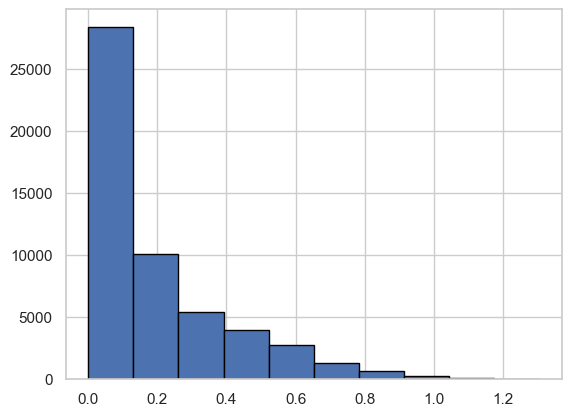

In [241]:
plt.hist(data_std_across_models['std_coral_cover_change'], edgecolor='black')

Thankfully, none really there. I'm going to scale it so that the values go between 0 and 1 so to represent 'Uncertainty'.

In [247]:
# Scale the standard deviation column (min-max scaling) to the range [0, 1]
min_std = data_std_across_models['std_coral_cover_change'].min()
max_std = data_std_across_models['std_coral_cover_change'].max()

# Apply the min-max scaling formula
data_std_across_models['std_coral_cover_change_scaled'] = (data_std_across_models['std_coral_cover_change'] - min_std) / (max_std - min_std)

Now I'll use the map code from earlier to plot this on a basemap:

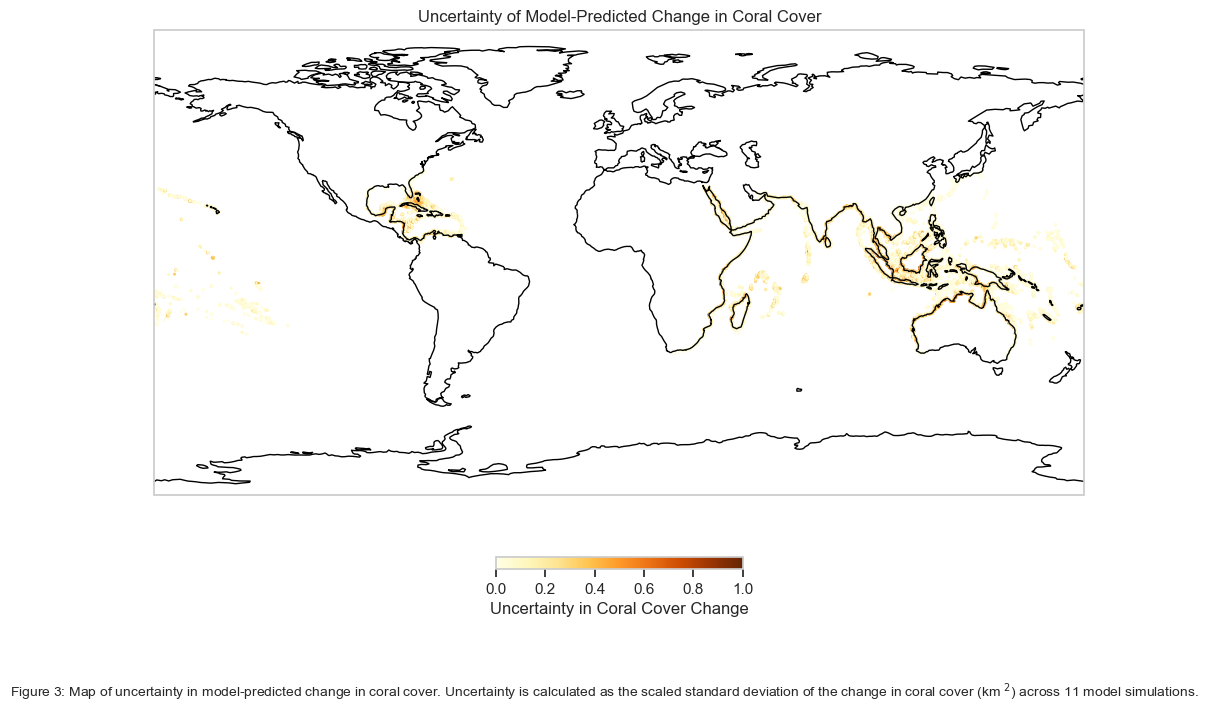

In [249]:
# Set up the map with Cartopy using PlateCarree projection (good for lat/lon)
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()  # Add coastline outlines
ax.set_global()  # Show the entire world view

# Plot the data points, coloring by coral_cover_change
scatter = sns.scatterplot(
    x='longitude', y='latitude', 
    hue='std_coral_cover_change_scaled', 
    palette='YlOrBr', # Appropriate palette
    data=data_std_across_models, 
    s=5,  # size of points
    marker='o',  # circular markers
    edgecolor='none',  # Remove the marker borders because it made everything black
    legend = False #remove sns colorbar because it sux
)

#have to do a bunch to add a pyplot colorbar
norm = plt.Normalize(vmin=data_std_across_models['std_coral_cover_change_scaled'].min(),
                     vmax=data_std_across_models['std_coral_cover_change_scaled'].max())
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=norm)
sm.set_array([])  # This is a dummy array for the colorbar

# Add colorbar with label
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.02, pad=0.1)
cbar.set_label("Uncertainty in Coral Cover Change")

# Set labels and title
plt.title("Uncertainty of Model-Predicted Change in Coral Cover")
# Add a caption
caption_text = "Figure 3: Map of uncertainty in model-predicted change in coral cover. Uncertainty is calculated as the scaled standard deviation of the change in coral cover (km $^2$) across 11 model simulations."
plt.figtext(0.5, -0.05, caption_text, ha="center", fontsize=10, wrap=True)

plt.show()


In [250]:
# Set up the map with Cartopy using PlateCarree projection (good for lat/lon)
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()  # Add coastline outlines
ax.set_global()  # Show the entire world view

# Plot the data points, coloring by coral_cover_change
scatter = sns.scatterplot(
    x='longitude', y='latitude', 
    hue='std_coral_cover_change_scaled', 
    palette='YlOrBr', # Appropriate palette
    data=data_std_across_models, 
    s=5,  # size of points
    marker='o',  # circular markers
    edgecolor='none',  # Remove the marker borders because it made everything black
    legend = False #remove sns colorbar because it sux
)

#have to do a bunch to add a pyplot colorbar
norm = plt.Normalize(vmin=data_std_across_models['std_coral_cover_change_scaled'].min(),
                     vmax=data_std_across_models['std_coral_cover_change_scaled'].max())
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=norm)
sm.set_array([])  # This is a dummy array for the colorbar

# Add colorbar with label
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.02, pad=0.1)
cbar.set_label("Uncertainty in Coral Cover Change")

# Set labels and title
plt.title("Uncertainty of Model-Predicted Change in Coral Cover")
# Add a caption
caption_text = "Figure 3: Map of uncertainty in model-predicted change in coral cover. Uncertainty is calculated as the scaled standard deviation of the change in coral cover (km $^2$) across 11 model simulations."
plt.figtext(0.5, -0.05, caption_text, ha="center", fontsize=10, wrap=True)

# Save the plot as a PNG file
output_path = os.path.join(output_folder, "Figure3.png")
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')  # Save with high resolution
plt.close()  # Close the figure to free up memory

print(f"Plot saved to {output_path}")

Plot saved to /Users/calliestephenson/Desktop/MBIO 691/Into_Sci_Computing/figs/Figure3.png
